# Image recognition using CNN on CIFAR-10 Dataset

In [2]:
from keras.datasets import cifar10
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.utils import load_img,to_categorical
from keras.models import Sequential
import matplotlib.pyplot as plt
from pathlib import Path

(X_train,y_train),(X_test,y_test)=cifar10.load_data()

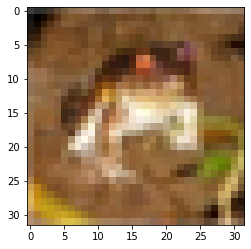

In [31]:
# Image ploting from train data
plt.imshow(X_train[0])

# Data Normalization and Encoding

In [8]:
# normalize data
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")

X_train/=255.0
X_test/=255.0

In [9]:
#One-hot encoding label
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [10]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (50000, 32, 32, 3)
Shape of y_train:  (50000, 10)
Shape of X_test:  (10000, 32, 32, 3)
Shape of y_test:  (10000, 10)


shape here is (number of images,image_height,image_width,rgd_states)

# CNN model

In [11]:
# model creation

model=Sequential()
model.add(Conv2D(32,(3,3),padding='same', input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
#compile model
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

#model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

# Training Model

In [14]:
# to train model

EPOCHS=20

Batch_size=32

Valiadtion_data=(X_test,y_test)

history=model.fit(X_train,y_train,
         batch_size=Batch_size,
         validation_data=Valiadtion_data,
         epochs=EPOCHS,
         verbose=1,
         shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 73s 46ms/step - loss: 1.6502 - accuracy: 0.3926 - val_loss: 1.2125 - val_accuracy: 0.5647
Epoch 2/20
1563/1563 [==============================] - 68s 44ms/step - loss: 1.2236 - accuracy: 0.5702 - val_loss: 1.1006 - val_accuracy: 0.6102
Epoch 3/20
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0452 - accuracy: 0.6358 - val_loss: 0.9105 - val_accuracy: 0.6838
Epoch 4/20
1563/1563 [==============================] - 84s 54ms/step - loss: 0.9293 - accuracy: 0.6789 - val_loss: 0.8637 - val_accuracy: 0.7041
Epoch 5/20
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8333 - accuracy: 0.7131 - val_loss: 0.8076 - val_accuracy: 0.7203
Epoch 6/20
1563/1563 [==============================] - 117s 75ms/step - loss: 0.7710 - accuracy: 0.7360 - val_loss: 0.7617 - val_accuracy: 0.7354
Epoch 7/20
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7128 - accuracy: 0.7545 - val_loss: 0.7327 

# Accuracy Curve

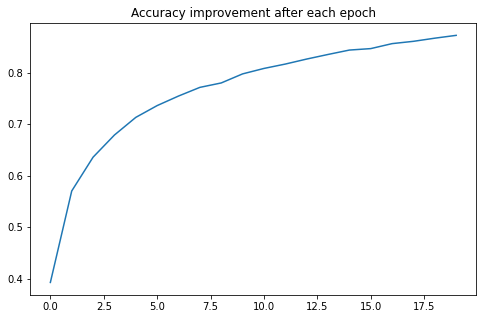

In [19]:
import pandas as pd
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("Accuracy improvement after each epoch")
plt.show()

# Saving Model And Model Weights

In [20]:
# save the neural network architecture
model.save("image_reco")

# save the trained neural network weights
model.save_weights("model_weights.h5")

INFO:tensorflow:Assets written to: image_reco\assets


INFO:tensorflow:Assets written to: image_reco\assets


# LOADING SAVED MODEL AND PREDICTING IMAGES WITH MODEL

In [56]:
from keras.models import load_model
from keras.models import model_from_json
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Classes labels present in cifar10 dataset
class_labels=[
    "Planes",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

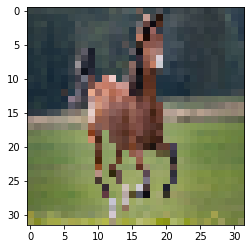

In [58]:
# laod an image file to test
from keras.utils import load_img,img_to_array

img= load_img("Sample testing images\\horse.jpg",target_size=(32,32))
plt.imshow(img)

In [59]:
# Convert the image to a numpy array

image_to_test= img_to_array(img)

In [60]:
# Add a fourth dimesnion to the image, since Keras expects a list of images, not a single image

list_of_images= np.expand_dims(image_to_test,axis=0)

In [61]:
# make predictions using the model
model_loaded=load_model("image_reco")
results= model_loaded.predict(list_of_images)

1/1 [==============================] - 0s 81ms/step


In [62]:
# since we are only testing one image, we only need to check the first result

single_result= results[0]

In [63]:
single_result

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [64]:
# We will get a likelihood score for all 10 possible classes. Find out which class has the highest score

most_likely_class_index= int(np.argmax(single_result))
class_likelihood= single_result[most_likely_class_index]

In [65]:
# Get the name of the most likely class

class_label= class_labels[most_likely_class_index]

In [66]:
# Print the result

print("This is image is a {}- Likelihood: {:2f}".format(class_label, class_likelihood))

This is image is a Horse- Likelihood: 1.000000
